In [ ]:
#Practical implementation of Linear Regtression algorithm including Ridge,Lasso,Elasticnet on Boston_house_price
#steps Followed
#EDA on dataet
#Preprocessiong
#model Training

#Ridge mainly used to avoid overfitting condition
#lasso used for feature selection
#Elasticnet as combination of lasso and ridge

#problem Statement: we have a dataset of boston house price and we have to predict the house price in boston based on different  parametes of the city

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
#basic desricption
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
#converting into dataframe
dataset = pd.DataFrame(boston.data,columns = boston.feature_names)

In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
dataset['Price'] = boston.target

In [13]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
#gives basic structure with rows and columns
dataset.shape

(506, 14)

In [15]:
#basic info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
#stastical desription of the dataset
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
#checking the null values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [18]:
#finding the correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


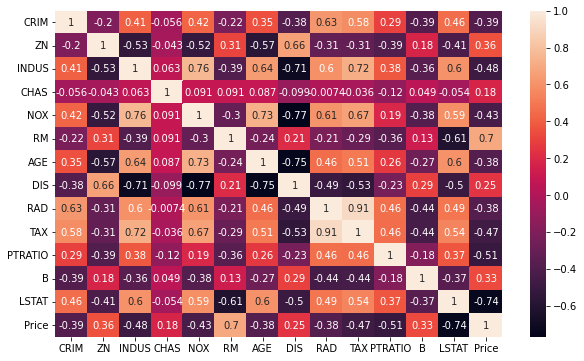

In [19]:
plt.subplots(figsize = (10,6))
sns.heatmap(dataset.corr(),annot = True)

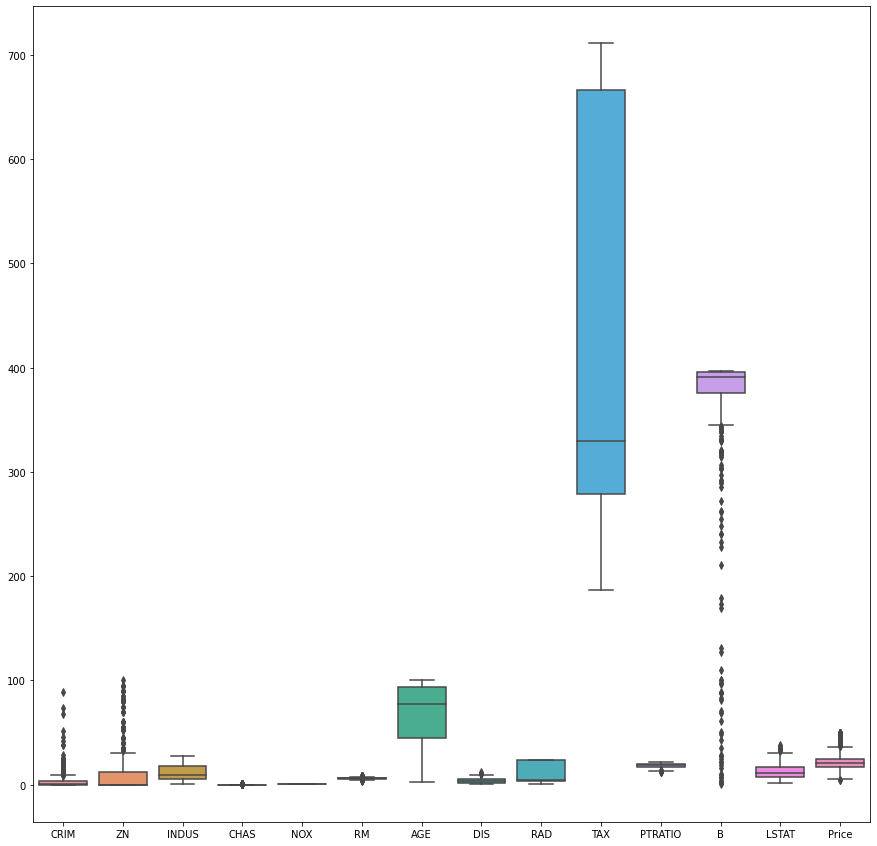

In [20]:
#finding the outliers
plt.subplots(figsize = (15,15))
sns.boxplot(data = dataset)

In [21]:
#creating the  dependent and independent variables
x = dataset.drop(columns = 'Price',axis = 1)
y = dataset['Price']

In [22]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [24]:
#spliting the dataset for train and test
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35)

In [26]:
x_train.shape,x_test.shape

((328, 13), (178, 13))

In [27]:
y_train.shape, y_test.shape

((328,), (178,))

In [28]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
scaler

StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
x_train

array([[-0.38842329, -0.50039446,  2.44216314, ...,  0.75380872,
         0.3764019 ,  0.76142873],
       [ 0.49300642, -0.50039446,  1.03429115, ...,  0.79802354,
         0.39512516,  0.62780336],
       [-0.3681835 , -0.50039446, -0.53130925, ...,  0.53273463,
         0.44438633, -0.91521798],
       ...,
       [-0.38488571,  0.43834112, -0.75329736, ...,  0.31166054,
         0.43817862, -0.95038255],
       [ 1.06796182, -0.50039446,  1.03429115, ...,  0.79802354,
         0.30841747,  0.06376366],
       [-0.39771049,  3.33988746, -1.43240574, ..., -2.12015442,
         0.43056917, -1.33578624]])

In [32]:
x_test

array([[-0.25717118, -0.50039446, -0.42031519, ...,  1.15174208,
        -1.20065664,  2.11737456],
       [ 1.72127951, -0.50039446,  1.03429115, ...,  0.79802354,
         0.17725458,  1.50269787],
       [-0.3669695 , -0.50039446, -0.70364213, ..., -0.43999135,
         0.32573899, -1.19794112],
       ...,
       [-0.38476287, -0.50039446, -0.59995031, ..., -0.21891727,
         0.3089181 , -0.96304179],
       [-0.37477041, -0.50039446, -0.19394573, ...,  0.35587536,
         0.44438633,  0.03703858],
       [-0.3170809 , -0.50039446, -0.42031519, ...,  1.15174208,
        -0.63605546, -0.1359711 ]])

In [33]:
#model training
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression()

In [35]:
regression

LinearRegression()

In [36]:
regression.fit(x_train,y_train)

LinearRegression()

In [37]:
#finding coefficient
regression.coef_

array([-1.01562667,  0.82674774,  0.8502625 ,  0.75232147, -2.13707958,
        3.05629522, -0.27076555, -2.66060894,  2.50467129, -2.47113285,
       -2.36731695,  0.77290965, -3.39548034])

In [38]:
#finding intercept
regression.intercept_

22.493902439024392

In [39]:
regression_predict = regression.predict(x_test)

In [40]:
regression_predict

array([ 9.23670708,  6.15118648, 38.59443222, 21.37249783, 29.62817393,
       29.23859686, 22.06494006, 21.55050919, 19.86741231, 27.2990682 ,
       21.08393863, 22.17696619, 11.69380232, 20.37944908, 22.18555763,
       24.30287347,  9.75363356, 16.13369359, 22.35591798,  8.71665057,
       25.47534819, 17.61532077, 24.36094465, 30.0760943 , 30.23468711,
       17.90428999, 22.76583464, 11.85063352, 24.14468008, 16.94668384,
       16.97125972, 24.47923719, 33.60784871, 16.709284  , 30.96979743,
       26.21162211, 21.535345  , 27.30240539, 15.83050551, 35.30137696,
       22.96379136, 25.16050008, 17.22976863, 21.95657252, 13.81456386,
       16.64750112, 25.64878701, 31.87353488, 43.55494149, 31.18528057,
        2.10378938, 21.95001257, 29.15670393, 12.05388512, 29.93950114,
       29.03297118, 27.11738945, 10.69392808, 29.45451343, 22.92253876,
       24.86408684, 20.43777817, 24.9107267 , 32.18447227, 24.53130467,
       25.88646813, 24.25081549, 25.0035981 , 37.21127449, 16.50

Text(0, 0.5, 'Predicted data')

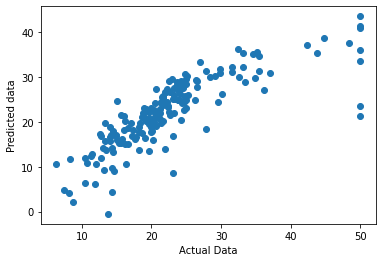

In [41]:
#Assumption of the predicted data
figsize = (15,10)
plt.scatter(y_test,regression_predict)
plt.xlabel("Actual Data")
plt.ylabel("Predicted data")

In [42]:
residuals = y_test - regression_predict

In [43]:
residuals

32      3.963293
406     5.748814
224     6.205568
368    28.627502
93     -4.628174
         ...    
387     2.668982
55      4.025343
42     -0.714431
498     0.484559
18      4.288390
Name: Price, Length: 178, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


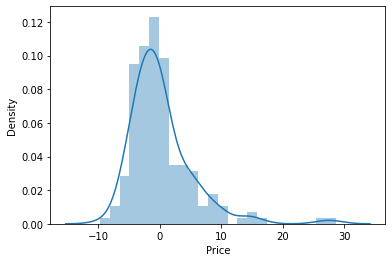

In [44]:
sns.distplot(residuals,kde =True)

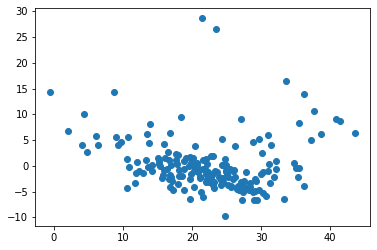

In [45]:
plt.scatter(regression_predict,residuals)

In [46]:
#Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,regression_predict))
print(mean_absolute_error(y_test,regression_predict))
print(np.sqrt(mean_squared_error(y_test,regression_predict)))

27.4326794977883
3.5389288593279646
5.237621549691071


In [47]:
from sklearn.metrics import r2_score


In [48]:
score = r2_score(y_test,regression_predict)
score

0.6585464342741372

In [49]:
#Adjusted R-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6314799930885505

**Ridge Regression**

In [50]:
from sklearn.linear_model import Ridge


In [51]:
ridge =Ridge()

In [52]:
ridge.fit(x_train,y_train)

Ridge()

In [53]:
ridge_predict = ridge.predict(x_test)

In [54]:
ridge.coef_

array([-1.00460041,  0.81012154,  0.79480177,  0.75747467, -2.08648069,
        3.0669548 , -0.27874792, -2.63125544,  2.39081896, -2.35930745,
       -2.34931836,  0.77150932, -3.37995739])

In [55]:
ridge.intercept_

22.493902439024392

Text(0, 0.5, 'Pridected Data')

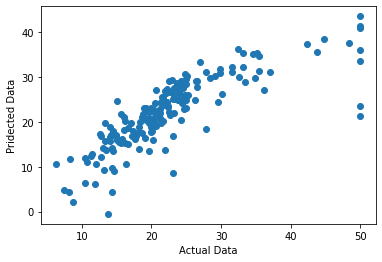

In [56]:
#Assumptions
plt.scatter(y_test,ridge_predict)
plt.xlabel('Actual Data')
plt.ylabel('Pridected Data')

In [57]:
#finding residuals
residuals = y_test-ridge_predict

In [58]:
residuals

32      3.893823
406     5.796835
224     6.248806
368    28.734428
93     -4.507471
         ...    
387     2.657990
55      4.063850
42     -0.692401
498     0.444199
18      4.252561
Name: Price, Length: 178, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


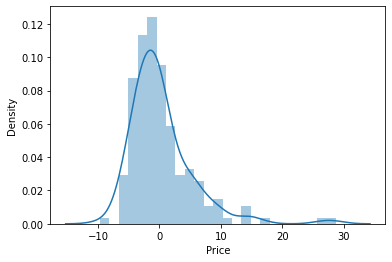

In [59]:
sns.distplot(residuals,kde =True)

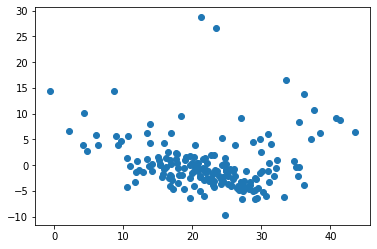

In [60]:
#scatter plot with prediction and residuals
plt.scatter(ridge_predict,residuals)

In [61]:
#performance metrics
print(mean_squared_error(y_test,ridge_predict))
print(mean_absolute_error(y_test,ridge_predict))
print(np.sqrt(mean_squared_error(y_test,ridge_predict)))

27.426072841502656
3.5249040667521387
5.236990819306699


In [62]:
#score
ridge_score = r2_score(y_test,ridge_predict)

In [63]:
ridge_score

0.6586286670850604

In [64]:
#Adjusted R-square
1 - (1-ridge_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6315687443539981

# **Lasso Regression**

In [65]:
#importing lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

In [66]:
#Training the model with train data
lasso.fit(x_train,y_train)

Lasso()

In [67]:
#predicting after training the model
lasso_predict = lasso.predict(x_test)

In [68]:
#finding the coefficient
lasso.coef_

array([-0.07683845,  0.        , -0.        ,  0.04943906, -0.        ,
        2.94897426, -0.        , -0.        , -0.        , -0.1623001 ,
       -1.60874111,  0.16279843, -3.3999431 ])

In [69]:
#finding intercept
lasso.intercept_

22.493902439024392

Text(0, 0.5, 'Predicted Data')

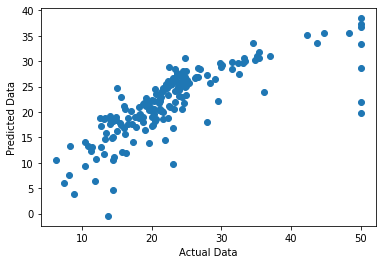

In [70]:
#Assumptions
plt.scatter(y_test,lasso_predict)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

In [71]:
#finding the residuals
residuals = y_test-lasso_predict


In [72]:
residuals

32      1.476917
406     5.428750
224     9.224009
368    30.285431
93     -0.410015
         ...    
387     1.402871
55      4.689574
42     -0.351116
498     0.636388
18      2.801673
Name: Price, Length: 178, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


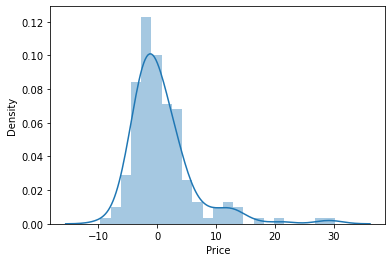

In [73]:
#checking how residuals are distributed
sns.distplot(residuals)

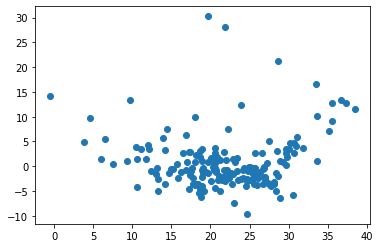

In [74]:
#scatter plot with prediction and residuals
plt.scatter(lasso_predict,residuals)

In [75]:
#performance metrics
print(mean_squared_error(y_test,lasso_predict))
print(mean_absolute_error(y_test,lasso_predict))
print(np.sqrt(mean_squared_error(y_test,lasso_predict)))

31.36153235981002
3.6082310295985103
5.600136816168871


In [76]:
#cheking R2-score and Adjusted R2 
lasso_score = r2_score(y_test,lasso_predict)
lasso_score

0.6096441453432387

In [77]:
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5787013032058126

**Elasticnet Regression**

In [79]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [80]:
elasticnet

ElasticNet()

In [81]:
#finding the best possible line
elasticnet.fit(x_train,y_train)

ElasticNet()

In [82]:
#find coefficient
elasticnet.coef_

array([-0.45450583,  0.15480542, -0.15131095,  0.42520936, -0.21761999,
        2.52509485, -0.        , -0.        , -0.        , -0.57767005,
       -1.3903203 ,  0.45643374, -2.27119861])

In [83]:
#finding intercept
elasticnet.intercept_

22.493902439024392

In [84]:
#predicting the test data
elasticnet_predict = elasticnet.predict(x_test)

In [85]:
elasticnet_predict

array([14.53189871,  7.94086227, 33.48660671, 18.17048888, 25.16988706,
       26.73192041, 19.52939188, 22.25469741, 20.32249451, 23.90975241,
       22.09440284, 19.95739493, 13.32208904, 23.27885373, 22.3051559 ,
       23.16373132, 14.70697858, 20.2782382 , 21.71187818,  9.44081625,
       26.19539554, 20.49457255, 23.25754976, 27.1668066 , 26.55991902,
       16.98961455, 22.3191279 , 14.28423329, 23.55409373, 16.60315971,
       17.94990967, 25.17268355, 27.35079111, 17.97405715, 29.9329977 ,
       24.37196829, 21.24232739, 25.28656611, 17.40590224, 30.45454483,
       22.63008259, 26.79491884, 18.20934841, 19.35084905, 20.71433003,
       17.54681658, 22.95762238, 28.70162937, 36.65227558, 27.39359252,
        6.0106151 , 20.1569531 , 27.9056824 , 13.96271363, 26.09151551,
       28.38717281, 24.59164362, 11.67007373, 25.37412172, 22.62909139,
       24.63825372, 20.84062867, 23.6012256 , 28.73212686, 27.13246059,
       25.08328093, 24.94340653, 24.04039391, 33.82892382, 16.43

In [86]:
#finding residuals
residuals = y_test-elasticnet_predict

In [87]:
residuals

32     -1.331899
406     3.959138
224    11.313393
368    31.829511
93     -0.169887
         ...    
387    -0.848182
55      4.875524
42     -0.116405
498     0.190682
18      2.048558
Name: Price, Length: 178, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


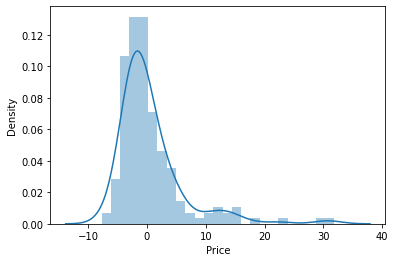

In [88]:
#distribution of residuals
sns.distplot(residuals)

In [ ]:
#observation
#distribution is right skewed

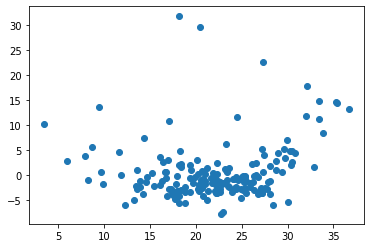

In [89]:
#scater plot to find relation between prediction and residuals
plt.scatter(elasticnet_predict,residuals)

In [90]:
#performance metrics
print(mean_squared_error(y_test,elasticnet_predict))
print(mean_absolute_error(y_test,elasticnet_predict))
print(np.sqrt(mean_squared_error(y_test,elasticnet_predict)))


33.03968666288968
3.58029344858676
5.748015889234273


In [91]:
#cheking R2-score and Adjusted R2 
elasticnet_score = r2_score(y_test,elasticnet_predict)
elasticnet_score


0.5887562196606255

In [92]:
1 - (1-elasticnet_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5561576273166506